In [ ]:
### okuldan dolayı pek zaman bulamadım kusura bakmayın boşluklarda yapabildiğim bu kadar oldu :(

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [64]:
data = pd.read_csv("Melbourne_housing_FULL.csv")
data_copy = data.copy()

In [65]:
data_copy.columns, data_copy.axes 

(Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'Regionname', 'Propertycount'],
       dtype='object'),
 [RangeIndex(start=0, stop=34857, step=1),
  Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
         'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
         'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
         'Longtitude', 'Regionname', 'Propertycount'],
        dtype='object')])

In [66]:
col_name = data_copy.columns

In [67]:
data_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [68]:
print(f"size: {data.size}\nshape: {data.shape}\ndimension: {data_copy.ndim}")

size: 731997
shape: (34857, 21)
dimension: 2


In [69]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [70]:
cat_var = data_copy.select_dtypes(include = "object")
num_var = data_copy.select_dtypes(exclude = "object")

In [71]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [72]:
data_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [73]:
data_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [74]:
for i in data_copy.columns:
    data_copy[i] = data_copy[i].fillna(data_copy[i].mode().iloc[0])

In [75]:
data_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [76]:
data_copy.duplicated().sum()

1

In [77]:
data_copy.loc[data_copy.duplicated(keep = False),:]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,600000.0,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,600000.0,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [78]:
data_copy.drop_duplicates(subset = ["Price"], inplace = True)

In [79]:
data_copy.duplicated().sum()

0

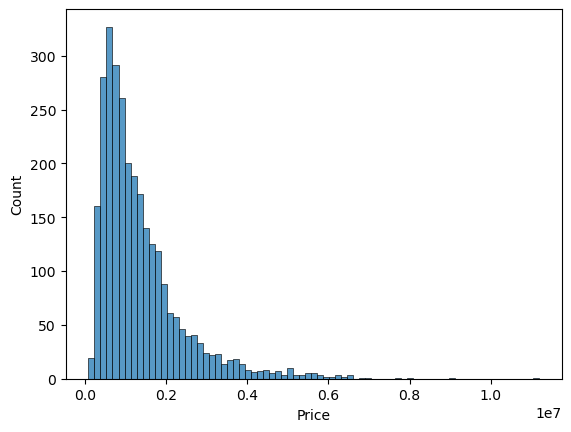

In [80]:
sb.histplot(data_copy["Price"]);

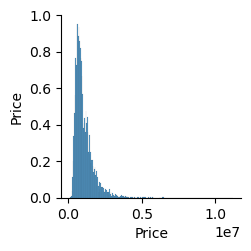

In [81]:
sb.pairplot(num_var, vars = ["Price"]);

C:\Users\Mert AYDIN\AppData\Local\Temp\ipykernel_12900\3267134975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_copy.corr()


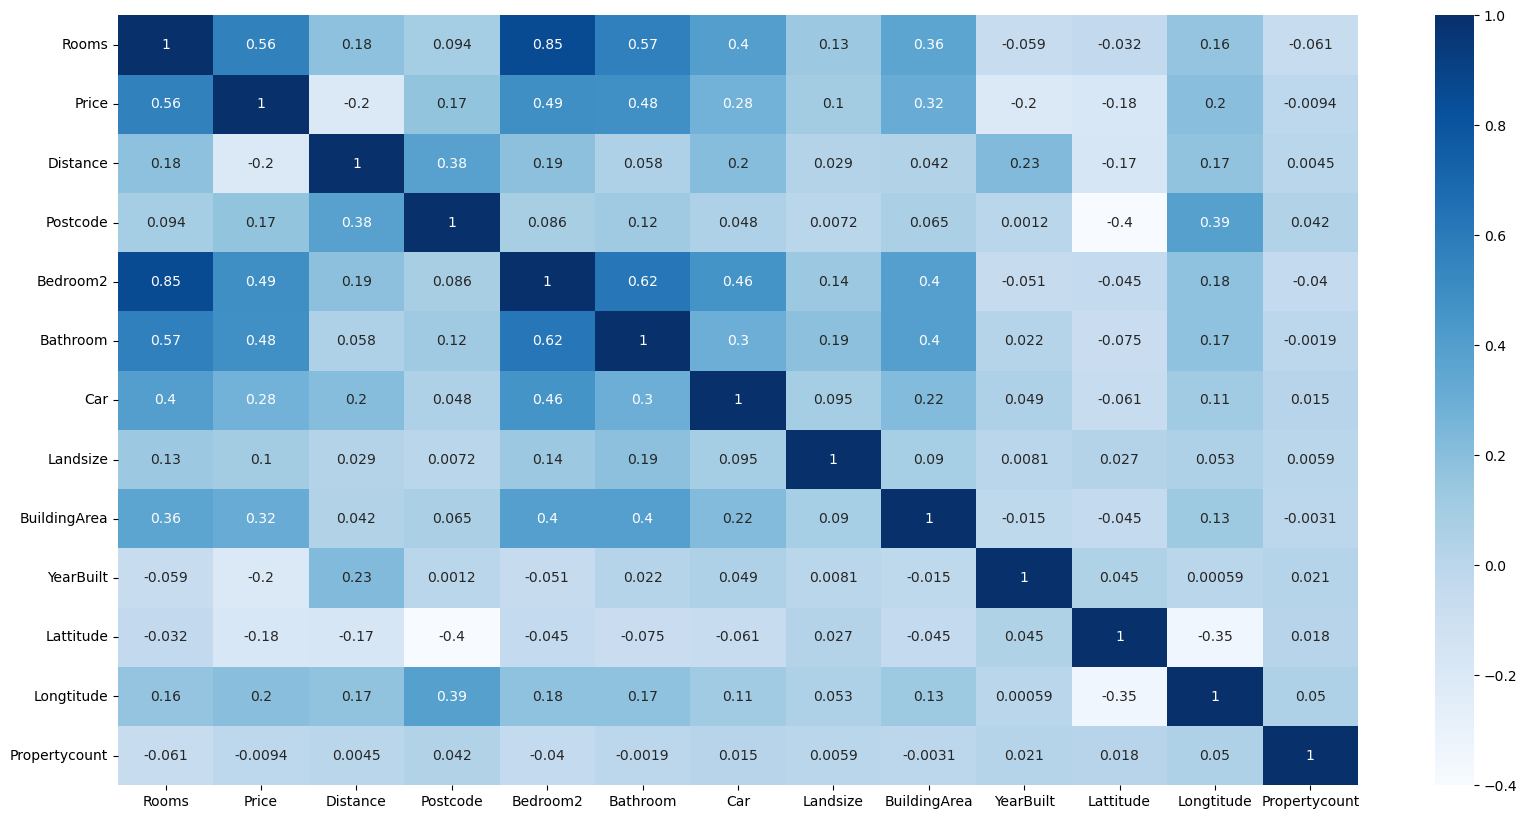

In [82]:
corr = data_copy.corr()
plt.figure(figsize = (20,10))
sb.heatmap(corr, cmap = "Blues", annot = True);

In [83]:
upper = data_copy.Price.mean() + 3*data_copy.Price.std()

lower = data_copy.Price.mean() -3*data_copy.Price.std()

In [84]:
upper , lower

(4519306.176263834, -1814067.7276396614)

In [85]:
data_copy['z_score'] = (data_copy.Price - data_copy.Price.mean()) / data_copy.Price.std()

In [86]:
data_copy[(data_copy['z_score'] > 3) | (data_copy['z_score'] < -3)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,z_score
178,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,25/02/2017,3.3,3206.0,...,1.0,330.0,207.0,1910.0,Port Phillip City Council,-37.84770,144.95580,Southern Metropolitan,3280.0,3.204340
426,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,...,4.0,1491.0,516.0,1935.0,Stonnington City Council,-37.86020,145.01300,Southern Metropolitan,4836.0,3.952756
977,Balwyn,1 Prowse Av,6,h,4600000.0,SP,Philip,26/07/2016,9.7,3103.0,...,2.0,0.0,120.0,1970.0,Boroondara City Council,-37.83610,144.99660,Southern Metropolitan,5682.0,3.076446
1828,Brighton,9 Sussex St,5,h,4700000.0,VB,Hodges,12/11/2016,11.2,3186.0,...,2.0,1073.0,221.0,1970.0,Bayside City Council,-37.91800,144.99110,Southern Metropolitan,10579.0,3.171183
1913,Brighton,11 Kent Av,4,h,5250000.0,VB,hockingstuart,27/06/2016,11.2,3186.0,...,2.0,0.0,120.0,1970.0,Bayside City Council,-37.83610,144.99660,Southern Metropolitan,10579.0,3.692232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33496,Malvern,6B Henderson Av,4,h,5040000.0,S,Marshall,17/03/2018,5.9,3144.0,...,2.0,465.0,120.0,1970.0,Stonnington City Council,-37.84783,145.03492,Southern Metropolitan,4675.0,3.493286
33498,Malvern,13 Wilks Av,5,h,6300000.0,S,RT,17/03/2018,5.9,3144.0,...,4.0,900.0,435.0,1930.0,Stonnington City Council,-37.84802,145.03341,Southern Metropolitan,4675.0,4.686962
34329,Hawthorn,29 Grove Rd,5,h,4630000.0,S,Marshall,24/02/2018,5.3,3122.0,...,2.0,613.0,160.0,2013.0,Boroondara City Council,-37.81457,145.02455,Southern Metropolitan,11308.0,3.104867
34404,Kew,21 Fellows St,3,h,4650000.0,PI,Marshall,24/02/2018,5.4,3101.0,...,2.0,1332.0,120.0,1970.0,Boroondara City Council,-37.80011,145.02686,Southern Metropolitan,10331.0,3.123814


In [87]:
data_copy["z_score"][(data_copy.z_score < - 3)] = lower  

data_copy["z_score"][(data_copy.z_score > 3)] = upper

C:\Users\Mert AYDIN\AppData\Local\Temp\ipykernel_12900\346660488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["z_score"][(data_copy.z_score < - 3)] = lower
C:\Users\Mert AYDIN\AppData\Local\Temp\ipykernel_12900\346660488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["z_score"][(data_copy.z_score > 3)] = upper


In [88]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn .model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression ,LogisticRegression ,ElasticNet,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [89]:
def one_hot_encoder(dataframe, cat_col, drop_first = True):
    dataframe = pd.get_dummies(dataframe, columns = cat_col, drop_first = drop_first)
    return dataframe

ohe = [i for i in data_copy.columns if 12 >= data_copy[i].nunique() > 2]

data_copy = one_hot_encoder(data_copy, ohe , drop_first = True)

In [90]:
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(np.array(cat_var).reshape(-1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
data_copy

,Suburb,Address,Price,SellerG,Date,Distance,Postcode,Landsize,BuildingArea,YearBuilt,...,Car_6.0,Car_7.0,Car_8.0,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,68 Studley St,600000.0,Jellis,3/09/2016,2.5,3067.0,126.0,120.0,1970.0,...,0,0,0,0,1,0,0,0,0,0
1,Abbotsford,85 Turner St,1480000.0,Biggin,3/12/2016,2.5,3067.0,202.0,120.0,1970.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,25 Bloomburg St,1035000.0,Biggin,4/02/2016,2.5,3067.0,156.0,79.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,5 Charles St,1465000.0,Biggin,4/03/2017,2.5,3067.0,134.0,150.0,1900.0,...,0,0,0,0,1,0,0,0,0,0
5,Abbotsford,40 Federation La,850000.0,Biggin,4/03/2017,2.5,3067.0,94.0,120.0,1970.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34676,Ringwood North,37 Through Rd,991888.0,Barry,24/02/2018,19.9,3134.0,1040.0,120.0,1970.0,...,0,0,0,0,0,0,0,0,0,0
34679,Rosanna,1/54 St Andrews Av,750240.0,Nelson,24/02/2018,8.9,3084.0,0.0,120.0,1970.0,...,0,0,0,0,0,0,0,0,0,0
34719,Southbank,611/250 St Kilda Rd,2685000.0,Abercromby's,24/02/2018,0.7,3006.0,0.0,120.0,1970.0,...,0,0,0,0,0,0,0,1,0,0
34739,Strathmore,31a Carnarvon Rd,1671000.0,Nelson,24/02/2018,8.2,3041.0,0.0,120.0,1970.0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
y = data_copy["Price"]
X = data_copy.drop("Price", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

In [93]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression':Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
}

In [94]:
import sklearn.metrics 

In [ ]:
for modell in models.values():
    modell.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) 
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)